<a href="https://colab.research.google.com/github/Kakumanu-Harshitha/Customer-Segmentation-System/blob/main/Customer_segmentation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#        ***CUSTOMER-SEGMENTATION-SYSTEM***
We use customer segmentation system datasets to understand and group customers based on shared characteristics. This process helps businesses optimize marketing strategies, improve customer service, and drive growth by tailoring experiences to specific customer needs.



# Steps to build this model:


1.   Import required packages

1.   Import dataset

1.   Data Preprocessing

*   Find and fill the missing values
*   Encoding data
*   Feature scaling

4.   Dimensionality Reduction
5.   Build a model
6.  K-Mean Clustering

*  Finding Optimal number of clusters
*  Build a K-Mean clustering model
*  Visualizing Clusters
*  Observing percentage of customers in each cluster
*  Evaluate K-Means cluster model
     *  Silhouette score
     *  Davies bouldin score  

7.   Hierarchical Clustering
*  Finding Optimal number of clusters
*  Build a Hierarchical clustering model
*  Visualizing Clusters
*  Observing percentage of customers in each cluster
*  Evaluate Hierarchical cluster model
    * Silhouette score
    * Davies bouldin score

8.  Finalize the model
9.  Cluster Analysis
10. Profiling



# 1.Import required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


 Here is the reference of the data set
 reference:https://www.kaggle.com/datasets/govindkrishnadas/segment

# 2. Import Dataset

In [ ]:
dataset=pd.read_csv("Customer_Segmentation_System.csv")
x=dataset.iloc[:,1:].values
dataset.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Above we removed Customer Id column because that will not have any impact.
Now dataset wil contain only four column.

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,1599.0,800.000000,461.735855,1.0,400.5,800.0,1199.5,1599.0
Age,1599.0,46.944966,14.207764,18.0,35.0,46.0,59.0,78.0
Annual Income (k$),1599.0,80.292683,35.605253,15.0,50.5,78.0,110.0,145.0
Spending Score (1-100),1599.0,54.918074,25.567113,1.0,34.0,55.0,76.0,100.0


In [ ]:
dataset.describe(include="object").T

,count,unique,top,freq
Gender,1599,2,Male,1138


The dataset contain total 1599 customers.

# 3. Data Preprocessing

# Handling missing values

In [ ]:
missing_values=dataset.isnull().sum()
missing_values

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


The dataset doesnot have any missing values.so we can go to the next step

# Encoding Data

Encoding data
  we have replace categorical data to either 1 or 0.
  Here the male is replace with 1 and female is replaced with 0.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,0]=le.fit_transform(x[:,0])
print(x[0])

[1 19 15 39]


# Feature scaling

Let's Normalize age,Annual Income, SpeningScore.Because these are having unique numerical values and by normalizing them model may understand better patterns between them.



In [ ]:

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x[:,2]=sc.fit_transform(x[:,2].reshape(-1,1)).flatten()
x[:,3]=sc.fit_transform(x[:,3].reshape(-1,1)).flatten()
x[:,1]=sc.fit_transform(x[:,1].reshape(-1,1)).flatten()
print(x[2])

[0 0.033333333333333326 0.007692307692307693 0.050505050505050504]



So, the age,Annual Income, SpeningScore were normalized into values between 0 and 1.

In [ ]:
x.dtype

dtype('O')

Here the x datashape is object. so we are changing it to numeric datatype.

In [ ]:
x = pd.DataFrame(x).apply(pd.to_numeric, errors='coerce').values

# 4.Dimenstionality Reduction

   In our dataset we are having less features.It is our wish to do dimensionality reduction or not.

let's check and reduce dimensionalty if possible.
Here we are going to use only 3 columns age, annual income, spending score because remaining two columns columnId and gender are not make any sense in clustering and they may also tends to bad results.

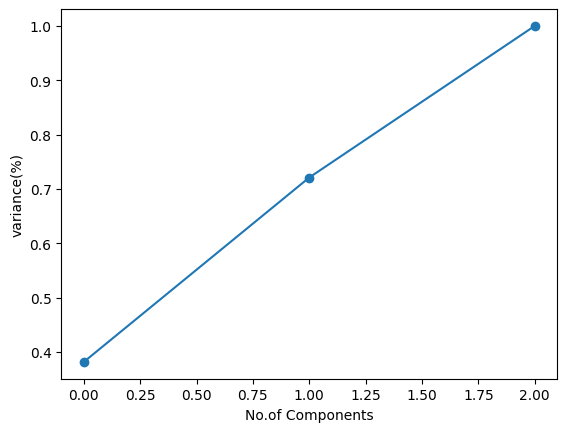

In [ ]:
y=x[:,1:]
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(y)
explained_variance_ratio=pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance_ratio),marker='o',markersize=6)
plt.xlabel("No.of Components")
plt.ylabel("variance(%)")
plt.show()


There is no any perfect elbow point from the graph. so lets take all the features for clustering and no reduction in dimensionality.


# 5. Build a model


# Let's build both the model K-Means clustering and Hierarchical clustering and finalize the model with good results



# 6. K-Mean Clustering

# Finding Optimal number of clusters
Let's use elbow method to find optimal number of clusters to use in K-mean clustering.

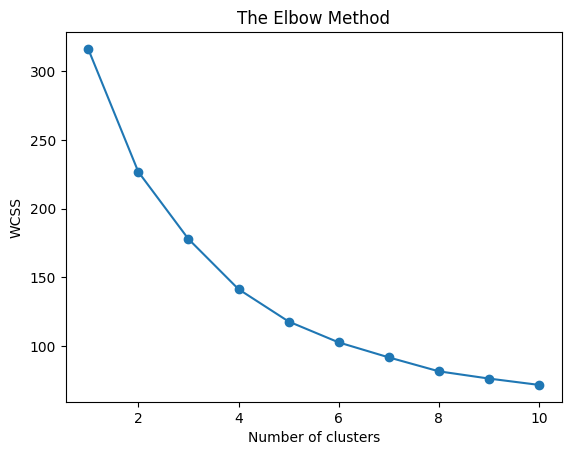

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(y)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see that the line bends near 4. So optimal number of clusters to use are 4.


# Build a K-Mean clustering model

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=42,init='k-means++',n_init=10)
y_kmeans=kmeans.fit_predict(y)

We have completed building the model using K-Means. Now let's visualize the clusters formed

# Visualizing Clusters

Cluster 0 data shape: (380, 3)
Cluster 0 centroid shape: (3,), value: [0.41065789 0.72078947 0.2881446 ]
Cluster 1 data shape: (419, 3)
Cluster 1 centroid shape: (3,), value: [0.29371519 0.31856068 0.72045033]
Cluster 2 data shape: (414, 3)
Cluster 2 centroid shape: (3,), value: [0.64573269 0.26122259 0.40367443]
Cluster 3 data shape: (386, 3)
Cluster 3 centroid shape: (3,), value: [0.58272884 0.74501794 0.75744492]


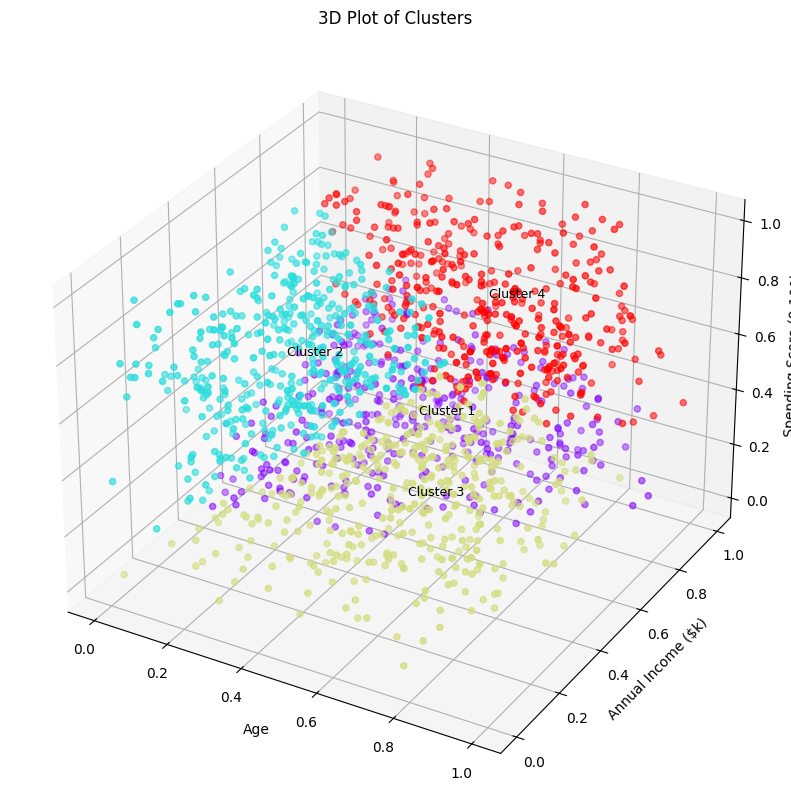

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y[:, 0], y[:, 1], y[:, 2], c=y_kmeans, cmap='rainbow')
for i in np.unique(y_kmeans):
    xi = y[y_kmeans == i, :]
    print(f"Cluster {i} data shape: {xi.shape}")
    if xi.ndim == 1:
        xi = np.expand_dims(xi, axis=0)
    centroid = np.atleast_1d(np.mean(xi, axis=0))
    print(f"Cluster {i} centroid shape: {centroid.shape}, value: {centroid}")
    if centroid.shape[0] == 3:
        ax.text(centroid[0], centroid[1], centroid[2], f'Cluster {i+1}', fontsize=9)
    else:
        print(f"Warning: Unexpected centroid shape {centroid.shape} for cluster {i}")
        ax.text(float(centroid[0]), float(centroid[0]), float(centroid[0]), f'Cluster {i+1}', fontsize=9)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income ($k)')
ax.set_zlabel('Spending Score (0-100)')
plt.title('3D Plot of Clusters')

plt.show()


Clusters are formed in a good manner but some of the points from one cluster look like near to another cluster.

# Observing percentage of customers in each cluster

In [ ]:
sum_values=[]
for i in range(0,4):
  sum=0
  for j in y_kmeans==i:
    if j==True:
      sum=sum+1
    else:
      pass
  sum_values.append(sum)
total_customers=1599
percentage_of_customers_in_cluster1=(sum_values[0])*100/total_customers
percentage_of_customers_in_cluster2=(sum_values[1])*100/total_customers
percentage_of_customers_in_cluster3=(sum_values[2])*100/total_customers
percentage_of_customers_in_cluster4=(sum_values[3])*100/total_customers
print(f'percentage of customers in cluster1:{percentage_of_customers_in_cluster1}')
print(f'percentage of customers in cluster2:{percentage_of_customers_in_cluster2}')
print(f'percentage of customers in cluster3:{percentage_of_customers_in_cluster3}')
print(f'percentage of customers in cluster4:{percentage_of_customers_in_cluster4}')


percentage of customers in cluster1:23.764853033145716
percentage of customers in cluster2:26.203877423389617
percentage of customers in cluster3:25.891181988742964
percentage of customers in cluster4:24.140087554721703



We can see that cluster 2 is having more no of clusters.Remaining clusters are nearly same


# Evaluate K-Means cluster model

In [ ]:
from sklearn.metrics import silhouette_score
result=silhouette_score(y,y_kmeans)
print(result)

0.28357277435858247



# Davies bouldin score

In [ ]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(y,y_kmeans)
print(score)

1.1468447526570256


We got silhouette score 0.283 and davies bouldin score 1.14 means that our model performed better.

Now lets build a hierarchical cluster model.

# 7. Hierarchical Clustering


# Finding Optimal number of clusters

[]

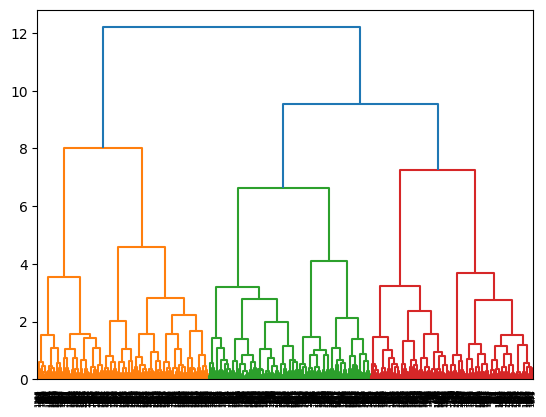

In [ ]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(y,method='ward'))
plt.plot()


We can see that there are 2 optimal clusters.


# Build a Hierarchical clustering model

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,linkage='ward',metric='euclidean')
y_hc=hc.fit_predict(y)



# Visualising the clusters

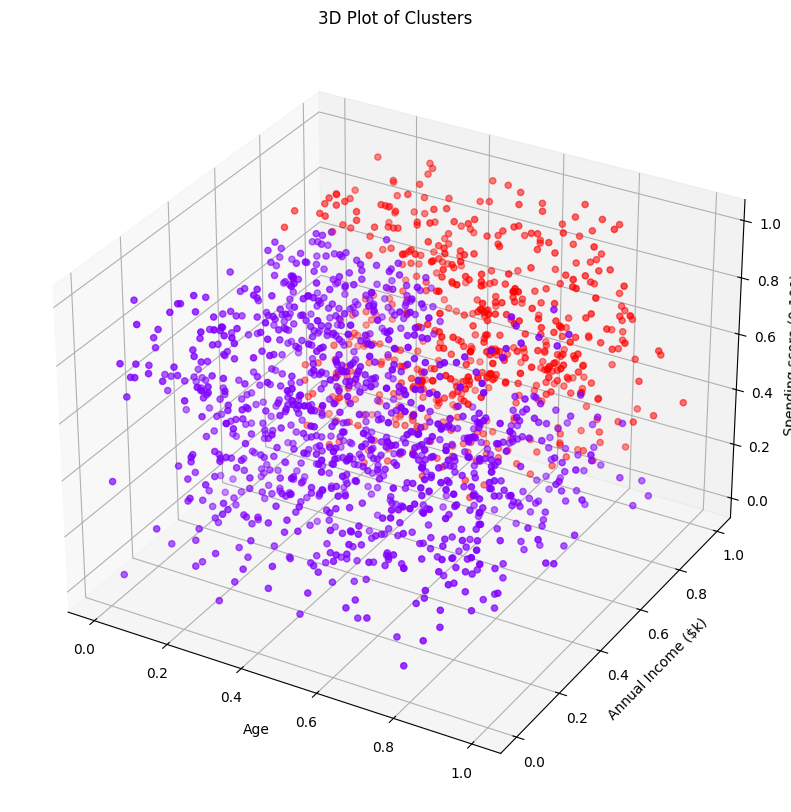

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(y[:, 0], y[:, 1], y[:, 2], c=y_hc, cmap='rainbow')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income ($k)')
ax.set_zlabel('Spending score (0-100)')

plt.title('3D Plot of Clusters')
plt.show()



# Observing percentage of customers in each cluster

In [ ]:
sum_values=[]
for i in range(0,4):
  sum=0
  for j in y_hc==i:
    if j==True:
      sum=sum+1
    else:
      pass
  sum_values.append(sum)
total_customers=1599
percentage_of_customers_in_cluster1=(sum_values[0])*100/total_customers
percentage_of_customers_in_cluster2=(sum_values[1])*100/total_customers
print(f'percentage of customers in cluster1:{percentage_of_customers_in_cluster1}')
print(f'percentage of customers in cluster2:{percentage_of_customers_in_cluster2}')

percentage of customers in cluster1:65.35334584115071
percentage of customers in cluster2:34.64665415884928


Here the cluster 1 is having more no of customers.

# Evaluate Hierarchical cluster model

# Silhoutte score

In [ ]:
from sklearn.metrics import silhouette_score
result=silhouette_score(y,y_hc)
print(result)

0.22901566521955552


# David Bouldin Score

In [ ]:
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(y,y_hc)
print(score)

1.6136769965025273


We got silhouette score 0.229 and davies bouldin score 1.613 means that our model performed better.

# 8. Finalize the model


By observing the both silhouette score and davis bouldin score of both the models K-Means cluster model performs well than hierarchical model as it has low davies bouldin score and high silhouette score. So let's consider K-Means model is good for our cluster and proceed to further steps.

Now let's check the dependecy of each cluster on each feature by centroids of each K-Mean cluster and evaluating mean of every of point in the cluster.

# 9. Cluster analysis

              Age                     Annual Income ($k)                      \
             mean    median       std               mean    median       std   
Cluster                                                                        
0        0.410658  0.383333  0.208732           0.720789  0.738462  0.175358   
1        0.293715  0.266667  0.158052           0.318561  0.315385  0.160797   
2        0.645733  0.666667  0.187357           0.261223  0.253846  0.143808   
3        0.582729  0.600000  0.206069           0.745018  0.753846  0.159399   

        Spending score (0-100)                      
                          mean    median       std  
Cluster                                             
0                     0.288145  0.282828  0.129392  
1                     0.720450  0.747475  0.178158  
2                     0.403674  0.398990  0.186327  
3                     0.757445  0.767677  0.152632  


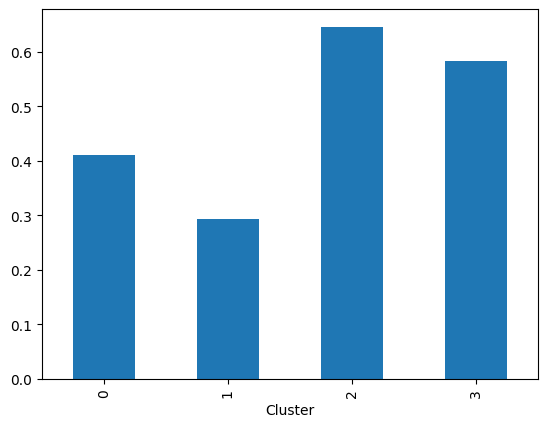

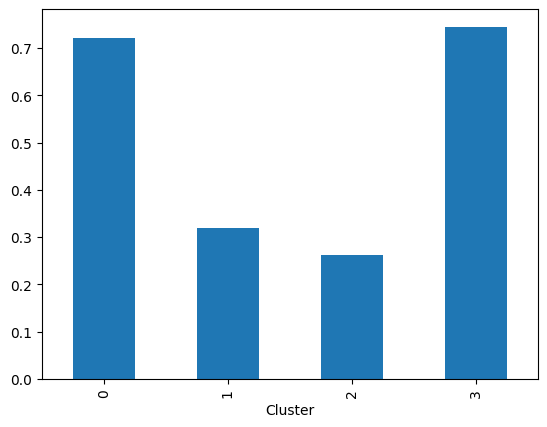

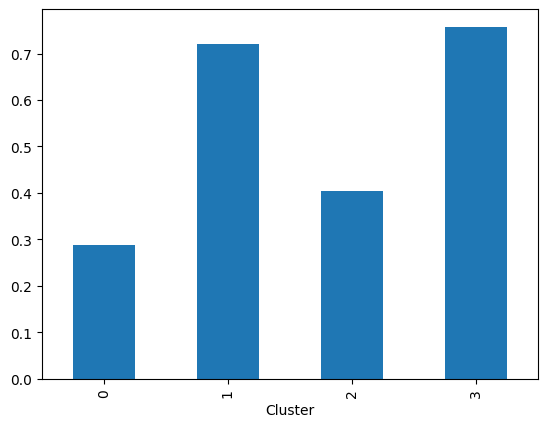

In [ ]:
y_df = pd.DataFrame(y, columns=['Age', 'Annual Income ($k)', 'Spending score (0-100)'])
y_df['Cluster'] = y_kmeans
centroids=kmeans.cluster_centers_
cluster_stats=y_df.groupby('Cluster').agg(['mean','median','std'])
print(cluster_stats)
for feature in ['Age', 'Annual Income ($k)', 'Spending score (0-100)']:
    y_df.groupby('Cluster')[feature].mean().plot(kind='bar',label=feature)
    plt.show()

Here the first visualization shows age, second visualization shows annual income, third visualization shows spending score.X-axis shows clusers numbers and Y-axis shows mean of cluster in respective feature.


# 10.Profiling

# CLUSTER-0: IMPULSIVE SPENDERS

This cluster is having the customers with moderate age,moderate income and high spending score. It mean this cluster contains the customers who are in youth age and having moderate annual income but spending lot's of money.

# CLUSTER-1: WEALTHY ELDERS

This cluster is having high age, high annual income and high spending score. It mean this cluster contain customers who are very old aged and having high annual income and also spending more money daily.

# CLUSTER-2: AFFLUENT MODERATES

This cluster is having moderate age, high annual income and moderate spending score.It mean this cluster contain customers who are middle aged, having high annual income and spending moderate money as per their needs in a planned way.

# CLUSTER-3: STABLE RETIREES

This cluster is having high age, moderate annual income and moderate spending score. It mean this cluster contain customers who are old aged, having moderate income and moderate spending as per their needs.